# Notizen zur Multhopp Analyse

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import WingExt, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np
import copy

## Definition von Tragflächen

wing: Flügel mit Bremsklappen

wing2: Flügel mit Verwindung

wing3: Flügel mit Querrudern

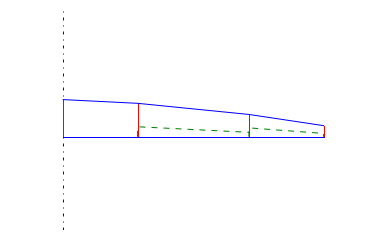

In [6]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

wing = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.7)
wing.set_airbrake(1,2.3)

wing2 = WingExt.create_from_planform(span_positions, chord_lengths, offsets, twists2, airfoils)
wing2.set_root_pos(0.7)

wing.set_flap('QR', 2, 5,[0.3,0.2])
wing.set_flap('QR2', 5, 7, [0.4,0.3])
wing.plot()

## Analyse Objekte werden erstellt und Berechnungsergebnisse geplottet

/home/jonathan/Dokumente/Akaflieg/wingstructure/wingstructure/multhopp.py:123: RuntimeWarning: invalid value encountered in double_scalars
  k = C_A**2/(np.pi*AR*C_Wi)


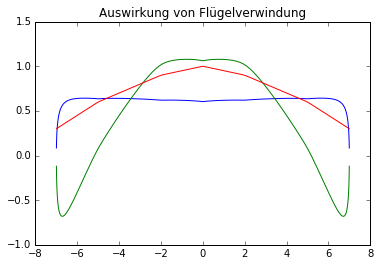

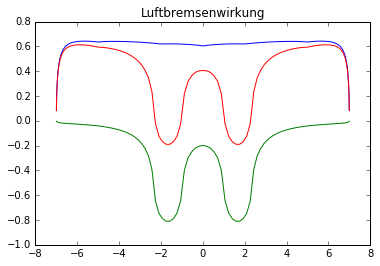

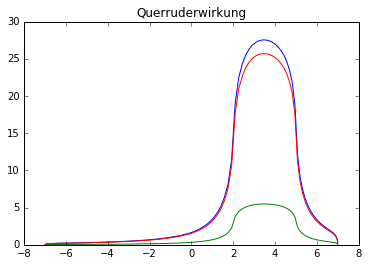

In [7]:
liftana = LiftAnalysis(wing)
liftana2 = LiftAnalysis(wing2)

plt.title('Auswirkung von Flügelverwindung')
plt.plot(liftana.calculation_positions, liftana.basic_distribution)
plt.plot(liftana2.calculation_positions, liftana2.basic_distribution)
plt.plot(liftana.calculation_positions, liftana.calculation_chord_lengths)
plt.figure()
plt.title('Luftbremsenwirkung')
plt.plot(liftana.calculation_positions, liftana.basic_distribution)
plt.plot(liftana.calculation_positions, liftana.airbrake_distribution)
plt.plot(liftana.calculation_positions, liftana.basic_distribution+liftana.airbrake_distribution)
plt.figure()
plt.title('Querruderwirkung')
# aileron_distribution entspricht 1° Ausschlag * 22.743 * np.arctan( 0.04715 * 10)==  Ausschlag 10°
plt.plot(liftana.calculation_positions, liftana.flaps_distribution['QR']*22.743 * np.arctan( 0.04715 * 10))
plt.plot(liftana.calculation_positions, liftana._calculate_aileron_distribution(wing, 2)[0]['QR'])
plt.plot(liftana.calculation_positions, liftana._calculate_aileron_distribution(wing, 10)[0]['QR'])

-0.47245527080037147

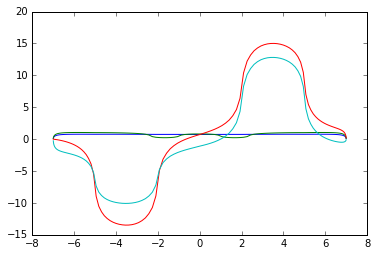

In [8]:
span_pos = liftana.calculation_positions

plt.plot(span_pos, liftana.calculate(1.2, airbrake=False))
plt.plot(span_pos, liftana.calculate(1.2, airbrake=True))
plt.plot(span_pos, liftana.calculate(1.2, flap_deflections={'QR':[5,-5]}))
plt.plot(span_pos, liftana.calculate(0.0, flap_deflections={'QR':[5,-3]}))
liftana.airbrake_lift

In [9]:
liftana.basic_distribution, liftana.airbrake_lift, liftana.flaps_lift, liftana.n

(array([ 0.08414828,  0.16338568,  0.23552751,  0.29974382,  0.35594056,
         0.4044823 ,  0.44598346,  0.48117955,  0.51083587,  0.53569427,
         0.55644028,  0.5736885 ,  0.58797713,  0.59977005,  0.6094619 ,
         0.61738542,  0.62381901,  0.62899434,  0.63310314,  0.63630337,
         0.63872433,  0.64047109,  0.64162775,  0.64226014,  0.64241726,
         0.64213173,  0.64141844,  0.64026886,  0.63864038,  0.63639735,
         0.63573633,  0.6377202 ,  0.63901238,  0.63984389,  0.64031509,
         0.64049308,  0.64041959,  0.64012491,  0.6396294 ,  0.63894729,
         0.63808739,  0.63705386,  0.63584683,  0.63446145,  0.63288833,
         0.63111057,  0.62910315,  0.62682414,  0.62420793,  0.62110821,
         0.61966852,  0.62047335,  0.6206794 ,  0.62045069,  0.61984813,
         0.61889623,  0.61759769,  0.61592705,  0.61384401,  0.61125281,
         0.60802031,  0.603736  ,  0.60802031,  0.61125281,  0.61384401,
         0.61592705,  0.61759769,  0.61889623,  0.6

In [10]:
def calc_lift_from_dist(span_pos, lift_distri, wing_chord_lengths):
    S =  np.trapz(wing_chord_lengths, span_pos)
    return np.trapz(np.multiply(lift_distri, wing_chord_lengths), span_pos) / S

In [11]:
calc_lift_from_dist(liftana.calculation_positions, liftana.basic_distribution, liftana.calculation_chord_lengths)

0.62380666681551333

In [12]:
calc_lift_from_dist(liftana2.calculation_positions, liftana2.basic_distribution, liftana2.calculation_chord_lengths)

0.623820258475278

In [13]:
liftmomana = LiftAndMomentAnalysis(wing)
liftmomana.calculate(1,flap_deflections = {'QR':[1,-2]})

TypeError: 'NoneType' object is not subscriptable

In [10]:
liftmomana.moment_basic_distribution

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
liftmomana.moment_aileron_distributions

{'QR': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.48049283, -0.48165274, -0.48271675, -0.48367874, -0.48453299,
        -0.48527425, -0.48589767, -0.48639886, -0.48677387, -0.48701918,
        -0.48713174, -0.48710892, -0.48694853, -0.48664883, -0.48620848,
        -0.48562658, -0.48490264, -0.48403656, -0.48302865, -0.48187958,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [12]:
np.interp(np.abs(liftana.calculation_positions), liftana.span_positions, [0]*4)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])